In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## 1. Importing the dataset and checking the data

In [2]:
df = pd.read_csv(r"D:\001_Data\Completed\Python Projects\50 Startups\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## 2. Data Pre-Processing

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
state_dummies = pd.get_dummies(df["State"], prefix="State", prefix_sep="_")

In [12]:
state_dummies[0:10]

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [13]:
df.drop("State", axis="columns", inplace=True)

In [14]:
startup_df = pd.concat([df, state_dummies], axis="columns")

In [15]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
startup_df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

## 3. Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

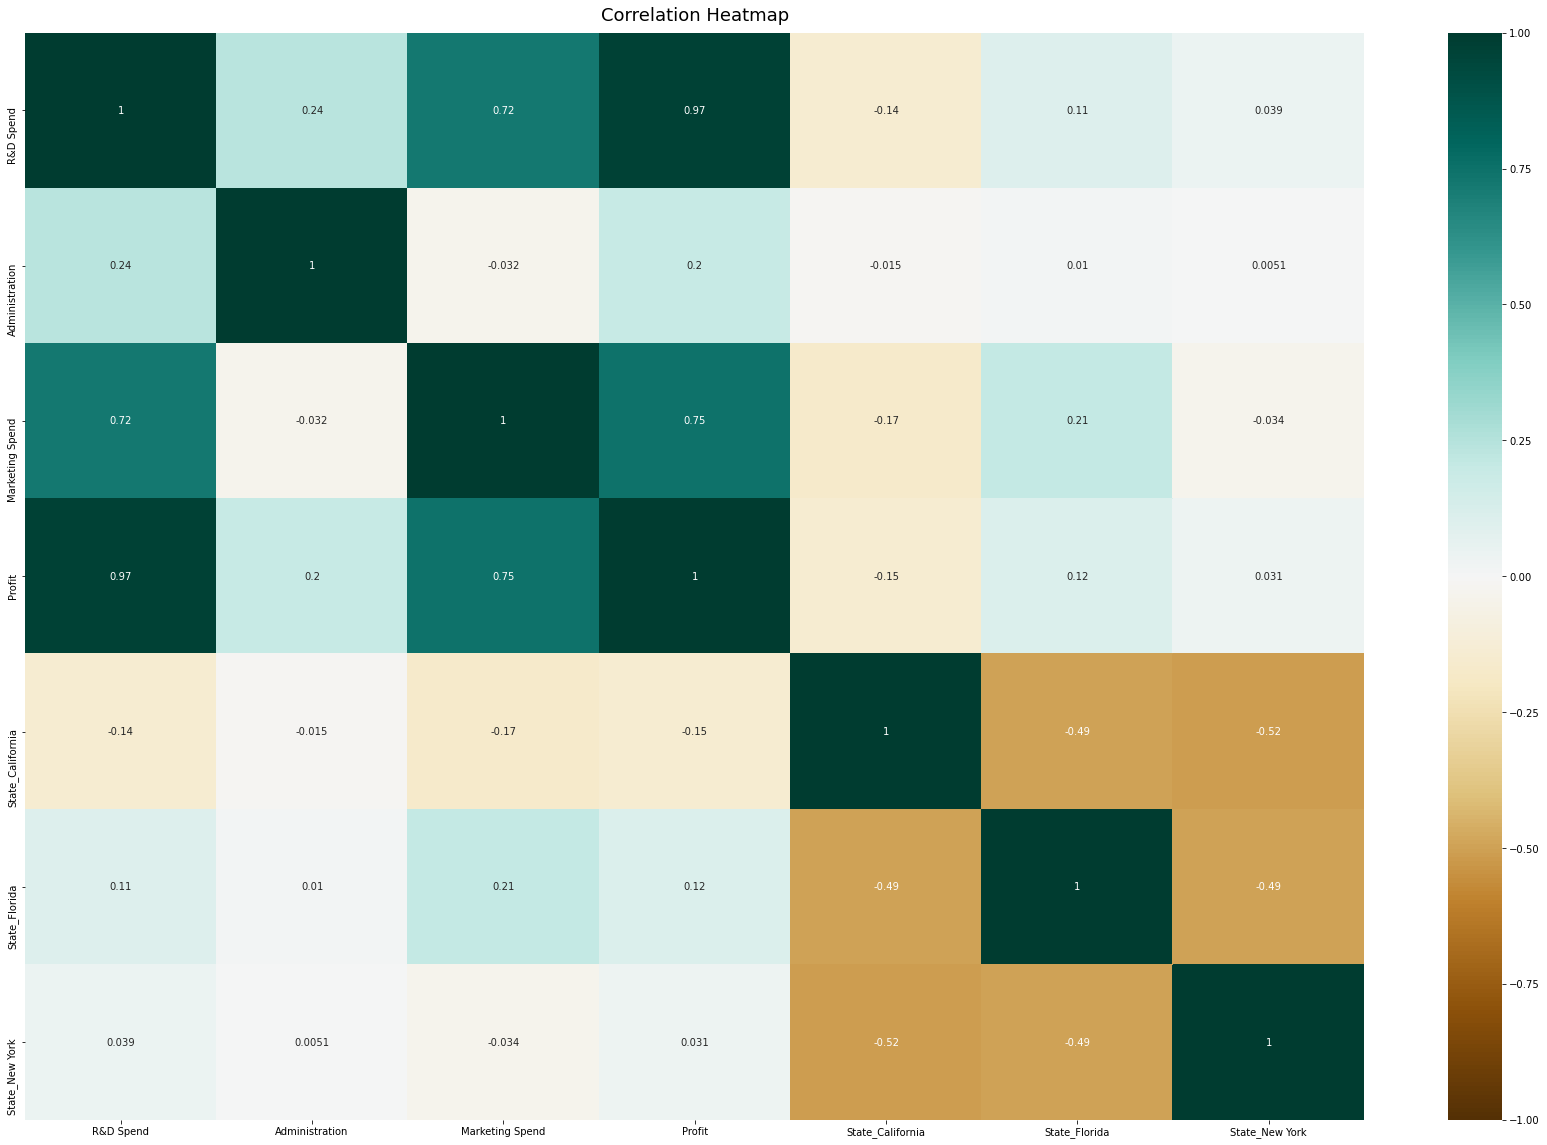

In [20]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(startup_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

Text(0, 0.5, 'Count')

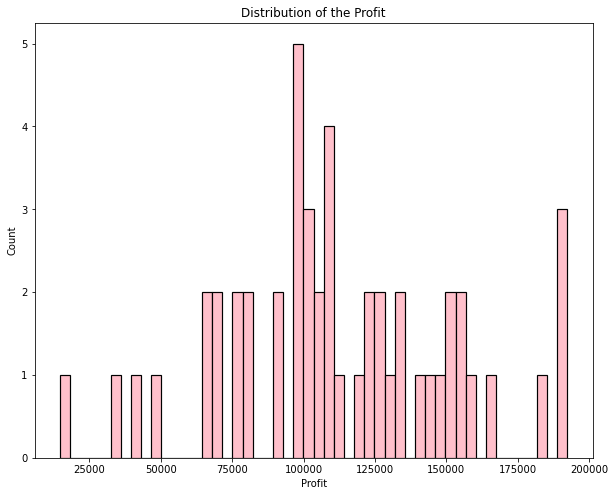

In [19]:
plt.figure(figsize=(10,8))
plt.hist(startup_df["Profit"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Profit")
plt.xlabel("Profit")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

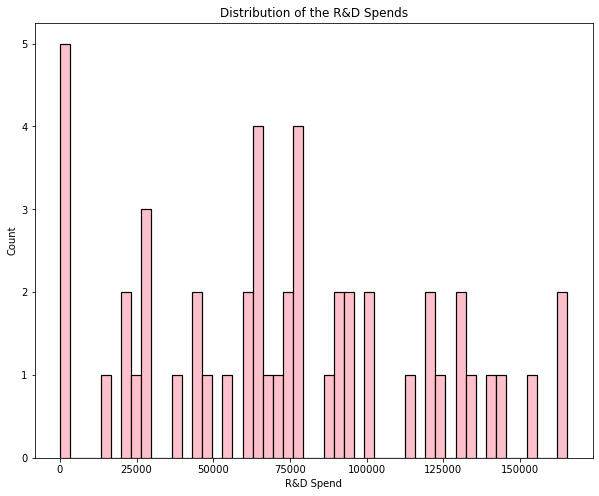

In [25]:
plt.figure(figsize=(10,8))
plt.hist(startup_df["R&D Spend"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the R&D Spends")
plt.xlabel("R&D Spend")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

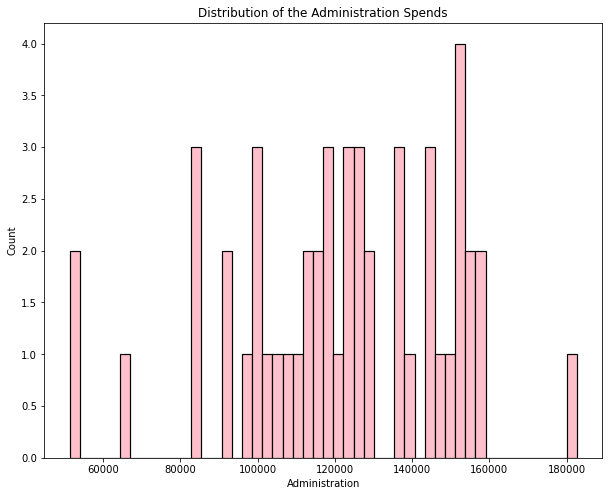

In [24]:
plt.figure(figsize=(10,8))
plt.hist(startup_df["Administration"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Administration Spends")
plt.xlabel("Administration")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

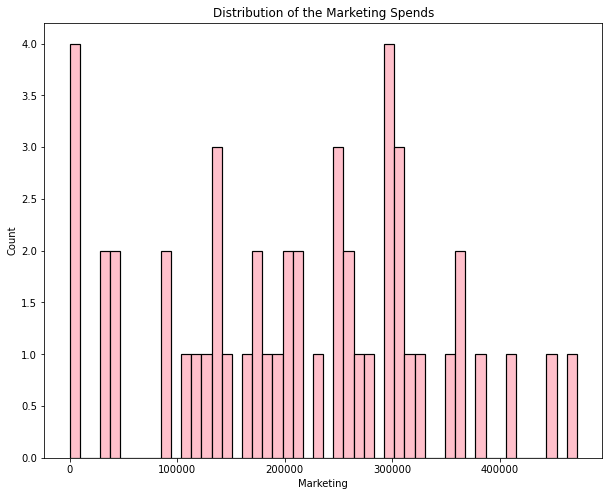

In [26]:
plt.figure(figsize=(10,8))
plt.hist(startup_df["Marketing Spend"], bins=50, color='pink', edgecolor='black', linewidth=1.2)
plt.title("Distribution of the Marketing Spends")
plt.xlabel("Marketing")
plt.ylabel("Count")

In [27]:
startup_df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

Text(0, 0.5, 'R&D Spends')

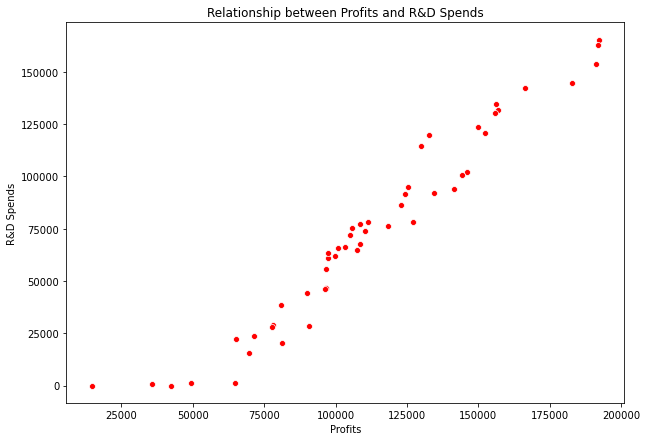

In [28]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Profit", y="R&D Spend", color="red")
plt.title("Relationship between Profits and R&D Spends")
plt.xlabel("Profits")
plt.ylabel("R&D Spends")

Text(0, 0.5, 'Administration Spends')

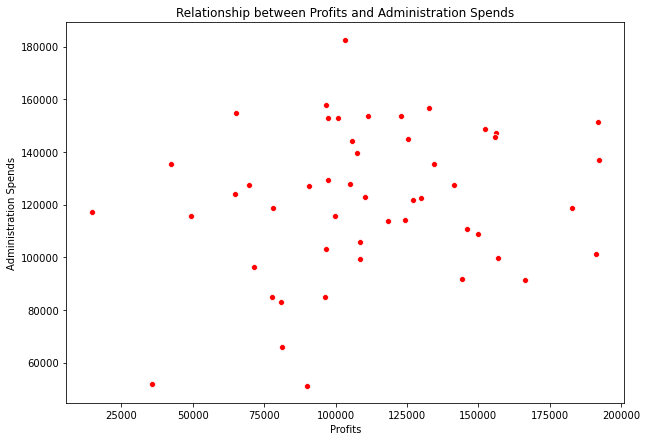

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Profit", y="Administration", color="red")
plt.title("Relationship between Profits and Administration Spends")
plt.xlabel("Profits")
plt.ylabel("Administration Spends")

Text(0, 0.5, 'Marketing Spends')

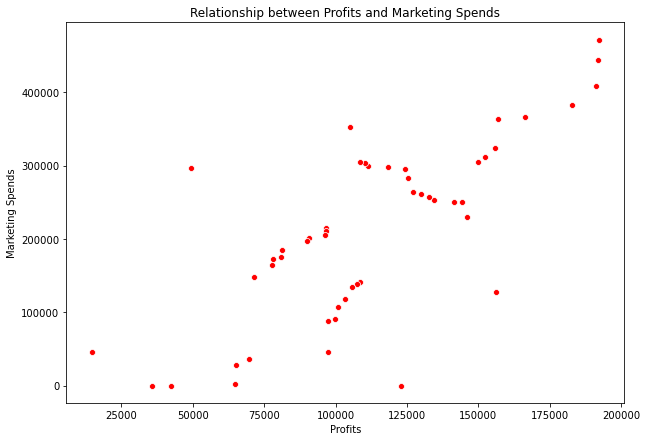

In [30]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Profit", y="Marketing Spend", color="red")
plt.title("Relationship between Profits and Marketing Spends")
plt.xlabel("Profits")
plt.ylabel("Marketing Spends")

## 4. Data Partitions and Pre-Processing

In [31]:
X = startup_df.drop("Profit", axis="columns")
y = startup_df["Profit"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
print(X_train.shape, X_test.shape)

(35, 6) (15, 6)


In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
print(X_train.min(), '\n')
print(X_train.max())

0.0 

1.0


## 5. Building the Neural Network Model

### 5.1 Model 1: Optimizer = SGD

In [37]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [38]:
model_1.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_1.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 68881920989069312.0000 - root_mean_squared_error: 262453648.0000
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 323565823983616.0000 - root_mean_squared_error: 17987936.0000
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 298446405763072.0000 - root_mean_squared_error: 17275602.0000
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 275268262428672.0000 - root_mean_squared_error: 16591210.0000
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 253907175473152.0000 - root_mean_squared_error: 15934465.0000
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 234196513587200.0000 - root_mean_squared_error: 15303480.0000
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 216006790217728.0000 - root_mean_squared_error: 14697169.0000
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 1

2/2 [==============================] - 0s 4ms/step - loss: 2345460563968.0000 - root_mean_squared_error: 1531489.6250
Epoch 64/500
2/2 [==============================] - 0s 0s/step - loss: 2163015024640.0000 - root_mean_squared_error: 1470719.2500
Epoch 65/500
2/2 [==============================] - 0s 0s/step - loss: 1994263494656.0000 - root_mean_squared_error: 1412184.0000
Epoch 66/500
2/2 [==============================] - 0s 4ms/step - loss: 1839895150592.0000 - root_mean_squared_error: 1356427.3750
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 1697076740096.0000 - root_mean_squared_error: 1302719.0000
Epoch 68/500
2/2 [==============================] - 0s 0s/step - loss: 1565520822272.0000 - root_mean_squared_error: 1251207.7500
Epoch 69/500
2/2 [==============================] - 0s 0s/step - loss: 1443882860544.0000 - root_mean_squared_error: 1201616.7500
Epoch 70/500
2/2 [==============================] - 0s 0s/step - loss: 1331459784704.0000 - root_mean

2/2 [==============================] - 0s 0s/step - loss: 15928573952.0000 - root_mean_squared_error: 126208.4531
Epoch 127/500
2/2 [==============================] - 0s 0s/step - loss: 14725313536.0000 - root_mean_squared_error: 121347.9062
Epoch 128/500
2/2 [==============================] - 0s 0s/step - loss: 13667900416.0000 - root_mean_squared_error: 116909.7969
Epoch 129/500
2/2 [==============================] - 0s 4ms/step - loss: 12767686656.0000 - root_mean_squared_error: 112994.1875
Epoch 130/500
2/2 [==============================] - 0s 4ms/step - loss: 11855069184.0000 - root_mean_squared_error: 108880.9844
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 11072243712.0000 - root_mean_squared_error: 105224.7266
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 10345098240.0000 - root_mean_squared_error: 101710.8594
Epoch 133/500
2/2 [==============================] - 0s 0s/step - loss: 9619211264.0000 - root_mean_squared_error: 

2/2 [==============================] - 0s 0s/step - loss: 1660065792.0000 - root_mean_squared_error: 40743.9062
Epoch 191/500
2/2 [==============================] - 0s 0s/step - loss: 1656274176.0000 - root_mean_squared_error: 40697.3477
Epoch 192/500
2/2 [==============================] - 0s 0s/step - loss: 1643283456.0000 - root_mean_squared_error: 40537.4336
Epoch 193/500
2/2 [==============================] - 0s 0s/step - loss: 1634987648.0000 - root_mean_squared_error: 40434.9805
Epoch 194/500
2/2 [==============================] - 0s 0s/step - loss: 1621947264.0000 - root_mean_squared_error: 40273.4062
Epoch 195/500
2/2 [==============================] - 0s 4ms/step - loss: 1617529856.0000 - root_mean_squared_error: 40218.5273
Epoch 196/500
2/2 [==============================] - 0s 0s/step - loss: 1615053440.0000 - root_mean_squared_error: 40187.7266
Epoch 197/500
2/2 [==============================] - 0s 0s/step - loss: 1608021504.0000 - root_mean_squared_error: 40100.1445
Epoch

2/2 [==============================] - 0s 4ms/step - loss: 1565122560.0000 - root_mean_squared_error: 39561.6289
Epoch 256/500
2/2 [==============================] - 0s 0s/step - loss: 1565291392.0000 - root_mean_squared_error: 39563.7617
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 1566049408.0000 - root_mean_squared_error: 39573.3438
Epoch 258/500
2/2 [==============================] - 0s 0s/step - loss: 1565732736.0000 - root_mean_squared_error: 39569.3398
Epoch 259/500
2/2 [==============================] - 0s 4ms/step - loss: 1566271104.0000 - root_mean_squared_error: 39576.1445
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 1566863488.0000 - root_mean_squared_error: 39583.6250
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 1567397760.0000 - root_mean_squared_error: 39590.3750
Epoch 262/500
2/2 [==============================] - 0s 4ms/step - loss: 1567642496.0000 - root_mean_squared_error: 39593.4648
E

2/2 [==============================] - 0s 4ms/step - loss: 1564504704.0000 - root_mean_squared_error: 39553.8203
Epoch 320/500
2/2 [==============================] - 0s 4ms/step - loss: 1564868992.0000 - root_mean_squared_error: 39558.4258
Epoch 321/500
2/2 [==============================] - 0s 0s/step - loss: 1565422208.0000 - root_mean_squared_error: 39565.4180
Epoch 322/500
2/2 [==============================] - 0s 0s/step - loss: 1565846912.0000 - root_mean_squared_error: 39570.7852
Epoch 323/500
2/2 [==============================] - 0s 0s/step - loss: 1564770944.0000 - root_mean_squared_error: 39557.1875
Epoch 324/500
2/2 [==============================] - 0s 0s/step - loss: 1564213888.0000 - root_mean_squared_error: 39550.1445
Epoch 325/500
2/2 [==============================] - 0s 4ms/step - loss: 1564258432.0000 - root_mean_squared_error: 39550.7070
Epoch 326/500
2/2 [==============================] - 0s 4ms/step - loss: 1564312704.0000 - root_mean_squared_error: 39551.3945
Ep

2/2 [==============================] - 0s 0s/step - loss: 1564367360.0000 - root_mean_squared_error: 39552.0859
Epoch 384/500
2/2 [==============================] - 0s 4ms/step - loss: 1564388992.0000 - root_mean_squared_error: 39552.3594
Epoch 385/500
2/2 [==============================] - 0s 4ms/step - loss: 1564309888.0000 - root_mean_squared_error: 39551.3594
Epoch 386/500
2/2 [==============================] - 0s 4ms/step - loss: 1564717824.0000 - root_mean_squared_error: 39556.5156
Epoch 387/500
2/2 [==============================] - 0s 4ms/step - loss: 1564489856.0000 - root_mean_squared_error: 39553.6328
Epoch 388/500
2/2 [==============================] - 0s 0s/step - loss: 1564304896.0000 - root_mean_squared_error: 39551.2930
Epoch 389/500
2/2 [==============================] - 0s 0s/step - loss: 1564439040.0000 - root_mean_squared_error: 39552.9922
Epoch 390/500
2/2 [==============================] - 0s 4ms/step - loss: 1564629120.0000 - root_mean_squared_error: 39555.3945
E

2/2 [==============================] - 0s 4ms/step - loss: 1565613952.0000 - root_mean_squared_error: 39567.8398
Epoch 448/500
2/2 [==============================] - 0s 4ms/step - loss: 1565374080.0000 - root_mean_squared_error: 39564.8086
Epoch 449/500
2/2 [==============================] - 0s 0s/step - loss: 1566363136.0000 - root_mean_squared_error: 39577.3047
Epoch 450/500
2/2 [==============================] - 0s 0s/step - loss: 1564708224.0000 - root_mean_squared_error: 39556.3945
Epoch 451/500
2/2 [==============================] - 0s 0s/step - loss: 1564211968.0000 - root_mean_squared_error: 39550.1211
Epoch 452/500
2/2 [==============================] - 0s 0s/step - loss: 1564306304.0000 - root_mean_squared_error: 39551.3125
Epoch 453/500
2/2 [==============================] - 0s 0s/step - loss: 1564300160.0000 - root_mean_squared_error: 39551.2344
Epoch 454/500
2/2 [==============================] - 0s 4ms/step - loss: 1564342400.0000 - root_mean_squared_error: 39551.7695
Epo

### 5.2 Model 2: Optimizer = RMSprop

In [86]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [87]:
model_2.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [88]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 13408796672.0000 - root_mean_squared_error: 115796.3594
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 13407511552.0000 - root_mean_squared_error: 115790.8125
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 13403488256.0000 - root_mean_squared_error: 115773.4375
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13395074048.0000 - root_mean_squared_error: 115737.0938
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13383377920.0000 - root_mean_squared_error: 115686.5469
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 13368392704.0000 - root_mean_squared_error: 115621.7656
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 13350011904.0000 - root_mean_squared_error: 115542.2500
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 13326231552.0000 - root_mean_squared_erro

2/2 [==============================] - 0s 0s/step - loss: 5696881664.0000 - root_mean_squared_error: 75477.6875
Epoch 66/500
2/2 [==============================] - 0s 0s/step - loss: 5512633344.0000 - root_mean_squared_error: 74247.1094
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 5337478656.0000 - root_mean_squared_error: 73058.0469
Epoch 68/500
2/2 [==============================] - 0s 0s/step - loss: 5114684928.0000 - root_mean_squared_error: 71517.0234
Epoch 69/500
2/2 [==============================] - 0s 4ms/step - loss: 4870095360.0000 - root_mean_squared_error: 69786.0703
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 4675985920.0000 - root_mean_squared_error: 68381.1797
Epoch 71/500
2/2 [==============================] - 0s 0s/step - loss: 4485812224.0000 - root_mean_squared_error: 66976.2031
Epoch 72/500
2/2 [==============================] - 0s 0s/step - loss: 4279450624.0000 - root_mean_squared_error: 65417.5117
Epoch 73/50

2/2 [==============================] - 0s 4ms/step - loss: 487695008.0000 - root_mean_squared_error: 22083.8184
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 479194304.0000 - root_mean_squared_error: 21890.5078
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 476872608.0000 - root_mean_squared_error: 21837.4121
Epoch 133/500
2/2 [==============================] - 0s 0s/step - loss: 475656032.0000 - root_mean_squared_error: 21809.5391
Epoch 134/500
2/2 [==============================] - 0s 4ms/step - loss: 475706816.0000 - root_mean_squared_error: 21810.7051
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 477550080.0000 - root_mean_squared_error: 21852.9199
Epoch 136/500
2/2 [==============================] - 0s 4ms/step - loss: 466454816.0000 - root_mean_squared_error: 21597.5645
Epoch 137/500
2/2 [==============================] - 0s 0s/step - loss: 465489664.0000 - root_mean_squared_error: 21575.2090
Epoch 138

2/2 [==============================] - 0s 4ms/step - loss: 327082496.0000 - root_mean_squared_error: 18085.4219
Epoch 196/500
2/2 [==============================] - 0s 4ms/step - loss: 320273824.0000 - root_mean_squared_error: 17896.1953
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 317808192.0000 - root_mean_squared_error: 17827.1758
Epoch 198/500
2/2 [==============================] - 0s 0s/step - loss: 317930848.0000 - root_mean_squared_error: 17830.6152
Epoch 199/500
2/2 [==============================] - 0s 0s/step - loss: 311769504.0000 - root_mean_squared_error: 17656.9961
Epoch 200/500
2/2 [==============================] - 0s 4ms/step - loss: 309472640.0000 - root_mean_squared_error: 17591.8340
Epoch 201/500
2/2 [==============================] - 0s 0s/step - loss: 308366752.0000 - root_mean_squared_error: 17560.3750
Epoch 202/500
2/2 [==============================] - 0s 0s/step - loss: 310830304.0000 - root_mean_squared_error: 17630.3809
Epoch 203/

2/2 [==============================] - 0s 0s/step - loss: 207166912.0000 - root_mean_squared_error: 14393.2939
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 205469440.0000 - root_mean_squared_error: 14334.2051
Epoch 262/500
2/2 [==============================] - 0s 4ms/step - loss: 204899424.0000 - root_mean_squared_error: 14314.3086
Epoch 263/500
2/2 [==============================] - 0s 4ms/step - loss: 203623744.0000 - root_mean_squared_error: 14269.6787
Epoch 264/500
2/2 [==============================] - 0s 0s/step - loss: 202658816.0000 - root_mean_squared_error: 14235.8281
Epoch 265/500
2/2 [==============================] - 0s 0s/step - loss: 204159296.0000 - root_mean_squared_error: 14288.4326
Epoch 266/500
2/2 [==============================] - 0s 0s/step - loss: 210308704.0000 - root_mean_squared_error: 14502.0244
Epoch 267/500
2/2 [==============================] - 0s 4ms/step - loss: 210227568.0000 - root_mean_squared_error: 14499.2266
Epoch 268/

2/2 [==============================] - 0s 0s/step - loss: 157757008.0000 - root_mean_squared_error: 12560.1357
Epoch 326/500
2/2 [==============================] - 0s 0s/step - loss: 156780032.0000 - root_mean_squared_error: 12521.1836
Epoch 327/500
2/2 [==============================] - 0s 4ms/step - loss: 158359712.0000 - root_mean_squared_error: 12584.1055
Epoch 328/500
2/2 [==============================] - 0s 4ms/step - loss: 156128736.0000 - root_mean_squared_error: 12495.1484
Epoch 329/500
2/2 [==============================] - 0s 4ms/step - loss: 155279552.0000 - root_mean_squared_error: 12461.1221
Epoch 330/500
2/2 [==============================] - 0s 4ms/step - loss: 158096720.0000 - root_mean_squared_error: 12573.6514
Epoch 331/500
2/2 [==============================] - 0s 0s/step - loss: 159537648.0000 - root_mean_squared_error: 12630.8213
Epoch 332/500
2/2 [==============================] - 0s 0s/step - loss: 153344688.0000 - root_mean_squared_error: 12383.2422
Epoch 333/

2/2 [==============================] - 0s 4ms/step - loss: 128451304.0000 - root_mean_squared_error: 11333.6357
Epoch 391/500
2/2 [==============================] - 0s 0s/step - loss: 128438944.0000 - root_mean_squared_error: 11333.0908
Epoch 392/500
2/2 [==============================] - 0s 4ms/step - loss: 128620760.0000 - root_mean_squared_error: 11341.1094
Epoch 393/500
2/2 [==============================] - 0s 0s/step - loss: 131633792.0000 - root_mean_squared_error: 11473.1768
Epoch 394/500
2/2 [==============================] - 0s 0s/step - loss: 131314968.0000 - root_mean_squared_error: 11459.2744
Epoch 395/500
2/2 [==============================] - ETA: 0s - loss: 72433112.0000 - root_mean_squared_error: 8510.764 - 0s 0s/step - loss: 129050304.0000 - root_mean_squared_error: 11360.0312
Epoch 396/500
2/2 [==============================] - 0s 0s/step - loss: 134918032.0000 - root_mean_squared_error: 11615.4219
Epoch 397/500
2/2 [==============================] - 0s 0s/step - los

2/2 [==============================] - 0s 0s/step - loss: 116781176.0000 - root_mean_squared_error: 10806.5342
Epoch 455/500
2/2 [==============================] - 0s 0s/step - loss: 116824888.0000 - root_mean_squared_error: 10808.5566
Epoch 456/500
2/2 [==============================] - 0s 4ms/step - loss: 120525248.0000 - root_mean_squared_error: 10978.3994
Epoch 457/500
2/2 [==============================] - 0s 4ms/step - loss: 126800880.0000 - root_mean_squared_error: 11260.5898
Epoch 458/500
2/2 [==============================] - 0s 0s/step - loss: 117983832.0000 - root_mean_squared_error: 10862.0361
Epoch 459/500
2/2 [==============================] - 0s 0s/step - loss: 114845616.0000 - root_mean_squared_error: 10716.6045
Epoch 460/500
2/2 [==============================] - 0s 0s/step - loss: 115244032.0000 - root_mean_squared_error: 10735.1777
Epoch 461/500
2/2 [==============================] - 0s 4ms/step - loss: 119461672.0000 - root_mean_squared_error: 10929.8525
Epoch 462/5

### 5.3 Model 3: Optimizer = Adam

In [90]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [91]:
model_3.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [92]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_3.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 13408779264.0000 - root_mean_squared_error: 115796.2812
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408452608.0000 - root_mean_squared_error: 115794.8750
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 13407902720.0000 - root_mean_squared_error: 115792.5000
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13407010816.0000 - root_mean_squared_error: 115788.6484
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13405545472.0000 - root_mean_squared_error: 115782.3203
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 13403361280.0000 - root_mean_squared_error: 115772.8828
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 13400203264.0000 - root_mean_squared_error: 115759.2500
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 13396132864.0000 - root_mean_squared_error: 

2/2 [==============================] - 0s 0s/step - loss: 1481329920.0000 - root_mean_squared_error: 38488.0508
Epoch 66/500
2/2 [==============================] - 0s 4ms/step - loss: 1305092736.0000 - root_mean_squared_error: 36126.0664
Epoch 67/500
2/2 [==============================] - 0s 4ms/step - loss: 1146447104.0000 - root_mean_squared_error: 33859.2266
Epoch 68/500
2/2 [==============================] - 0s 0s/step - loss: 1018394304.0000 - root_mean_squared_error: 31912.2910
Epoch 69/500
2/2 [==============================] - 0s 0s/step - loss: 911398912.0000 - root_mean_squared_error: 30189.3848
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 822802944.0000 - root_mean_squared_error: 28684.5410
Epoch 71/500
2/2 [==============================] - 0s 4ms/step - loss: 746763520.0000 - root_mean_squared_error: 27326.9746
Epoch 72/500
2/2 [==============================] - 0s 4ms/step - loss: 689403136.0000 - root_mean_squared_error: 26256.4883
Epoch 73/500

2/2 [==============================] - 0s 4ms/step - loss: 463527296.0000 - root_mean_squared_error: 21529.6836
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 461843616.0000 - root_mean_squared_error: 21490.5469
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 460095424.0000 - root_mean_squared_error: 21449.8359
Epoch 133/500
2/2 [==============================] - 0s 4ms/step - loss: 458408448.0000 - root_mean_squared_error: 21410.4746
Epoch 134/500
2/2 [==============================] - 0s 0s/step - loss: 456948896.0000 - root_mean_squared_error: 21376.3633
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 455188192.0000 - root_mean_squared_error: 21335.1406
Epoch 136/500
2/2 [==============================] - 0s 4ms/step - loss: 453496192.0000 - root_mean_squared_error: 21295.4492
Epoch 137/500
2/2 [==============================] - 0s 0s/step - loss: 451642720.0000 - root_mean_squared_error: 21251.8867
Epoch 138

2/2 [==============================] - 0s 0s/step - loss: 355082016.0000 - root_mean_squared_error: 18843.6191
Epoch 196/500
2/2 [==============================] - 0s 0s/step - loss: 355187488.0000 - root_mean_squared_error: 18846.4180
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 354863744.0000 - root_mean_squared_error: 18837.8281
Epoch 198/500
2/2 [==============================] - 0s 4ms/step - loss: 353417376.0000 - root_mean_squared_error: 18799.3984
Epoch 199/500
2/2 [==============================] - 0s 0s/step - loss: 351554880.0000 - root_mean_squared_error: 18749.7969
Epoch 200/500
2/2 [==============================] - 0s 4ms/step - loss: 350048640.0000 - root_mean_squared_error: 18709.5859
Epoch 201/500
2/2 [==============================] - 0s 4ms/step - loss: 348493472.0000 - root_mean_squared_error: 18667.9805
Epoch 202/500
2/2 [==============================] - 0s 4ms/step - loss: 347216928.0000 - root_mean_squared_error: 18633.7578
Epoch 203

2/2 [==============================] - 0s 0s/step - loss: 265864448.0000 - root_mean_squared_error: 16305.3506
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 264617872.0000 - root_mean_squared_error: 16267.0791
Epoch 262/500
2/2 [==============================] - 0s 4ms/step - loss: 263522896.0000 - root_mean_squared_error: 16233.3887
Epoch 263/500
2/2 [==============================] - 0s 4ms/step - loss: 262416496.0000 - root_mean_squared_error: 16199.2744
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 261217424.0000 - root_mean_squared_error: 16162.2217
Epoch 265/500
2/2 [==============================] - 0s 4ms/step - loss: 260261104.0000 - root_mean_squared_error: 16132.6104
Epoch 266/500
2/2 [==============================] - 0s 4ms/step - loss: 259731344.0000 - root_mean_squared_error: 16116.1826
Epoch 267/500
2/2 [==============================] - 0s 0s/step - loss: 259678208.0000 - root_mean_squared_error: 16114.5342
Epoch 26

2/2 [==============================] - 0s 0s/step - loss: 208125424.0000 - root_mean_squared_error: 14426.5527
Epoch 326/500
2/2 [==============================] - 0s 0s/step - loss: 207377520.0000 - root_mean_squared_error: 14400.6084
Epoch 327/500
2/2 [==============================] - 0s 0s/step - loss: 206158208.0000 - root_mean_squared_error: 14358.2109
Epoch 328/500
2/2 [==============================] - ETA: 0s - loss: 222033056.0000 - root_mean_squared_error: 14900.773 - 0s 0s/step - loss: 205346400.0000 - root_mean_squared_error: 14329.9131
Epoch 329/500
2/2 [==============================] - 0s 4ms/step - loss: 204476128.0000 - root_mean_squared_error: 14299.5146
Epoch 330/500
2/2 [==============================] - 0s 4ms/step - loss: 203950768.0000 - root_mean_squared_error: 14281.1328
Epoch 331/500
2/2 [==============================] - 0s 4ms/step - loss: 203832880.0000 - root_mean_squared_error: 14277.0049
Epoch 332/500
2/2 [==============================] - 0s 0s/step - 

2/2 [==============================] - 0s 4ms/step - loss: 167194208.0000 - root_mean_squared_error: 12930.3604
Epoch 390/500
2/2 [==============================] - 0s 4ms/step - loss: 166575680.0000 - root_mean_squared_error: 12906.4199
Epoch 391/500
2/2 [==============================] - 0s 0s/step - loss: 166039488.0000 - root_mean_squared_error: 12885.6309
Epoch 392/500
2/2 [==============================] - 0s 0s/step - loss: 165641792.0000 - root_mean_squared_error: 12870.1904
Epoch 393/500
2/2 [==============================] - 0s 0s/step - loss: 165175040.0000 - root_mean_squared_error: 12852.0439
Epoch 394/500
2/2 [==============================] - 0s 0s/step - loss: 164704400.0000 - root_mean_squared_error: 12833.7217
Epoch 395/500
2/2 [==============================] - 0s 4ms/step - loss: 164335536.0000 - root_mean_squared_error: 12819.3418
Epoch 396/500
2/2 [==============================] - 0s 4ms/step - loss: 163915008.0000 - root_mean_squared_error: 12802.9297
Epoch 397/

2/2 [==============================] - 0s 0s/step - loss: 147059024.0000 - root_mean_squared_error: 12126.7891
Epoch 455/500
2/2 [==============================] - 0s 4ms/step - loss: 147232752.0000 - root_mean_squared_error: 12133.9502
Epoch 456/500
2/2 [==============================] - 0s 4ms/step - loss: 146932928.0000 - root_mean_squared_error: 12121.5889
Epoch 457/500
2/2 [==============================] - 0s 4ms/step - loss: 145932192.0000 - root_mean_squared_error: 12080.2393
Epoch 458/500
2/2 [==============================] - 0s 0s/step - loss: 144970432.0000 - root_mean_squared_error: 12040.3672
Epoch 459/500
2/2 [==============================] - 0s 0s/step - loss: 143674432.0000 - root_mean_squared_error: 11986.4268
Epoch 460/500
2/2 [==============================] - 0s 0s/step - loss: 142748368.0000 - root_mean_squared_error: 11947.7344
Epoch 461/500
2/2 [==============================] - 0s 4ms/step - loss: 142551024.0000 - root_mean_squared_error: 11939.4736
Epoch 462/

### 5.4 Model 4: Optimizer = Adadelta

In [49]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [50]:
model_4.compile(loss='mse', optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [51]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_4.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 13408801792.0000 - root_mean_squared_error: 115796.3828
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408800768.0000 - root_mean_squared_error: 115796.3750
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 13408800768.0000 - root_mean_squared_error: 115796.3750
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 13408801792.0000 - root_mean_squared_error: 115796.3828
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13408800768.0000 - root_mean_squared_error: 115796.3750
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 13408801792.0000 - root_mean_squared_error: 115796.3828
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 13408800768.0000 - root_mean_squared_error: 115796.3750
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 13408800768.0000 - root_mean_squared_error: 1

2/2 [==============================] - 0s 0s/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 66/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 68/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 69/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 71/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115796.3359
Epoch 72/500
2/2 [==============================] - 0s 4ms/step - loss: 13408791552.0000 - root_mean_squared_error: 115

2/2 [==============================] - 0s 0s/step - loss: 13408782336.0000 - root_mean_squared_error: 115796.2969
Epoch 130/500
2/2 [==============================] - 0s 4ms/step - loss: 13408781312.0000 - root_mean_squared_error: 115796.2891
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 13408781312.0000 - root_mean_squared_error: 115796.2891
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 13408782336.0000 - root_mean_squared_error: 115796.2969
Epoch 133/500
2/2 [==============================] - 0s 0s/step - loss: 13408780288.0000 - root_mean_squared_error: 115796.2891
Epoch 134/500
2/2 [==============================] - 0s 4ms/step - loss: 13408781312.0000 - root_mean_squared_error: 115796.2891
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 13408780288.0000 - root_mean_squared_error: 115796.2891
Epoch 136/500
2/2 [==============================] - 0s 0s/step - loss: 13408780288.0000 - root_mean_squared_error

2/2 [==============================] - 0s 4ms/step - loss: 13408770048.0000 - root_mean_squared_error: 115796.2422
Epoch 193/500
2/2 [==============================] - 0s 4ms/step - loss: 13408770048.0000 - root_mean_squared_error: 115796.2422
Epoch 194/500
2/2 [==============================] - 0s 4ms/step - loss: 13408769024.0000 - root_mean_squared_error: 115796.2422
Epoch 195/500
2/2 [==============================] - 0s 4ms/step - loss: 13408770048.0000 - root_mean_squared_error: 115796.2422
Epoch 196/500
2/2 [==============================] - 0s 4ms/step - loss: 13408769024.0000 - root_mean_squared_error: 115796.2422
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 13408769024.0000 - root_mean_squared_error: 115796.2422
Epoch 198/500
2/2 [==============================] - 0s 0s/step - loss: 13408769024.0000 - root_mean_squared_error: 115796.2422
Epoch 199/500
2/2 [==============================] - 0s 0s/step - loss: 13408769024.0000 - root_mean_squared_err

2/2 [==============================] - 0s 4ms/step - loss: 13408759808.0000 - root_mean_squared_error: 115796.2031
Epoch 256/500
2/2 [==============================] - 0s 0s/step - loss: 13408758784.0000 - root_mean_squared_error: 115796.1953
Epoch 257/500
2/2 [==============================] - 0s 4ms/step - loss: 13408758784.0000 - root_mean_squared_error: 115796.1953
Epoch 258/500
2/2 [==============================] - 0s 4ms/step - loss: 13408758784.0000 - root_mean_squared_error: 115796.1953
Epoch 259/500
2/2 [==============================] - 0s 0s/step - loss: 13408757760.0000 - root_mean_squared_error: 115796.1875
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 13408757760.0000 - root_mean_squared_error: 115796.1875
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 13408757760.0000 - root_mean_squared_error: 115796.1875
Epoch 262/500
2/2 [==============================] - 0s 0s/step - loss: 13408758784.0000 - root_mean_squared_erro

2/2 [==============================] - 0s 4ms/step - loss: 13408746496.0000 - root_mean_squared_error: 115796.1406
Epoch 319/500
2/2 [==============================] - 0s 0s/step - loss: 13408744448.0000 - root_mean_squared_error: 115796.1328
Epoch 320/500
2/2 [==============================] - 0s 0s/step - loss: 13408745472.0000 - root_mean_squared_error: 115796.1406
Epoch 321/500
2/2 [==============================] - 0s 0s/step - loss: 13408745472.0000 - root_mean_squared_error: 115796.1406
Epoch 322/500
2/2 [==============================] - 0s 0s/step - loss: 13408744448.0000 - root_mean_squared_error: 115796.1328
Epoch 323/500
2/2 [==============================] - 0s 4ms/step - loss: 13408745472.0000 - root_mean_squared_error: 115796.1406
Epoch 324/500
2/2 [==============================] - 0s 4ms/step - loss: 13408743424.0000 - root_mean_squared_error: 115796.1250
Epoch 325/500
2/2 [==============================] - 0s 4ms/step - loss: 13408744448.0000 - root_mean_squared_error

2/2 [==============================] - 0s 0s/step - loss: 13408729088.0000 - root_mean_squared_error: 115796.0703
Epoch 382/500
2/2 [==============================] - 0s 0s/step - loss: 13408729088.0000 - root_mean_squared_error: 115796.0703
Epoch 383/500
2/2 [==============================] - 0s 0s/step - loss: 13408728064.0000 - root_mean_squared_error: 115796.0625
Epoch 384/500
2/2 [==============================] - 0s 4ms/step - loss: 13408729088.0000 - root_mean_squared_error: 115796.0703
Epoch 385/500
2/2 [==============================] - 0s 4ms/step - loss: 13408728064.0000 - root_mean_squared_error: 115796.0625
Epoch 386/500
2/2 [==============================] - 0s 4ms/step - loss: 13408727040.0000 - root_mean_squared_error: 115796.0547
Epoch 387/500
2/2 [==============================] - 0s 4ms/step - loss: 13408726016.0000 - root_mean_squared_error: 115796.0547
Epoch 388/500
2/2 [==============================] - 0s 0s/step - loss: 13408726016.0000 - root_mean_squared_error

2/2 [==============================] - 0s 4ms/step - loss: 13408708608.0000 - root_mean_squared_error: 115795.9766
Epoch 445/500
2/2 [==============================] - 0s 4ms/step - loss: 13408709632.0000 - root_mean_squared_error: 115795.9844
Epoch 446/500
2/2 [==============================] - 0s 0s/step - loss: 13408708608.0000 - root_mean_squared_error: 115795.9766
Epoch 447/500
2/2 [==============================] - 0s 0s/step - loss: 13408708608.0000 - root_mean_squared_error: 115795.9766
Epoch 448/500
2/2 [==============================] - 0s 4ms/step - loss: 13408707584.0000 - root_mean_squared_error: 115795.9766
Epoch 449/500
2/2 [==============================] - 0s 0s/step - loss: 13408706560.0000 - root_mean_squared_error: 115795.9688
Epoch 450/500
2/2 [==============================] - 0s 0s/step - loss: 13408707584.0000 - root_mean_squared_error: 115795.9766
Epoch 451/500
2/2 [==============================] - 0s 4ms/step - loss: 13408706560.0000 - root_mean_squared_error

### 5.5 Model 5: Optimizer = Adagrad

In [53]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [54]:
model_5.compile(loss='mse', optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [55]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_5.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 13408802816.0000 - root_mean_squared_error: 115796.3828
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408613376.0000 - root_mean_squared_error: 115795.5703
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 13408473088.0000 - root_mean_squared_error: 115794.9609
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13408291840.0000 - root_mean_squared_error: 115794.1797
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13408105472.0000 - root_mean_squared_error: 115793.3750
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 13407892480.0000 - root_mean_squared_error: 115792.4531
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 13407668224.0000 - root_mean_squared_error: 115791.4844
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 13407429632.0000 - root_mean_squared_error: 115

2/2 [==============================] - 0s 4ms/step - loss: 13373252608.0000 - root_mean_squared_error: 115642.7812
Epoch 66/500
2/2 [==============================] - 0s 0s/step - loss: 13372533760.0000 - root_mean_squared_error: 115639.6719
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 13371798528.0000 - root_mean_squared_error: 115636.4922
Epoch 68/500
2/2 [==============================] - 0s 0s/step - loss: 13370966016.0000 - root_mean_squared_error: 115632.8906
Epoch 69/500
2/2 [==============================] - 0s 4ms/step - loss: 13370131456.0000 - root_mean_squared_error: 115629.2812
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 13369148416.0000 - root_mean_squared_error: 115625.0312
Epoch 71/500
2/2 [==============================] - 0s 4ms/step - loss: 13368354816.0000 - root_mean_squared_error: 115621.6016
Epoch 72/500
2/2 [==============================] - 0s 4ms/step - loss: 13367414784.0000 - root_mean_squared_error: 1156

2/2 [==============================] - 0s 4ms/step - loss: 13306748928.0000 - root_mean_squared_error: 115354.8828
Epoch 130/500
2/2 [==============================] - 0s 0s/step - loss: 13305730048.0000 - root_mean_squared_error: 115350.4688
Epoch 131/500
2/2 [==============================] - 0s 0s/step - loss: 13304567808.0000 - root_mean_squared_error: 115345.4297
Epoch 132/500
2/2 [==============================] - 0s 4ms/step - loss: 13303412736.0000 - root_mean_squared_error: 115340.4219
Epoch 133/500
2/2 [==============================] - 0s 0s/step - loss: 13302071296.0000 - root_mean_squared_error: 115334.6094
Epoch 134/500
2/2 [==============================] - 0s 4ms/step - loss: 13300579328.0000 - root_mean_squared_error: 115328.1406
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 13299159040.0000 - root_mean_squared_error: 115321.9766
Epoch 136/500
2/2 [==============================] - 0s 0s/step - loss: 13297639424.0000 - root_mean_squared_error

2/2 [==============================] - 0s 4ms/step - loss: 13220005888.0000 - root_mean_squared_error: 114978.2812
Epoch 193/500
2/2 [==============================] - 0s 4ms/step - loss: 13218459648.0000 - root_mean_squared_error: 114971.5625
Epoch 194/500
2/2 [==============================] - 0s 0s/step - loss: 13216798720.0000 - root_mean_squared_error: 114964.3359
Epoch 195/500
2/2 [==============================] - 0s 4ms/step - loss: 13215307776.0000 - root_mean_squared_error: 114957.8516
Epoch 196/500
2/2 [==============================] - 0s 4ms/step - loss: 13213799424.0000 - root_mean_squared_error: 114951.2891
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 13212439552.0000 - root_mean_squared_error: 114945.3750
Epoch 198/500
2/2 [==============================] - 0s 0s/step - loss: 13210931200.0000 - root_mean_squared_error: 114938.8125
Epoch 199/500
2/2 [==============================] - 0s 0s/step - loss: 13209641984.0000 - root_mean_squared_erro

2/2 [==============================] - 0s 4ms/step - loss: 13118135296.0000 - root_mean_squared_error: 114534.4297
Epoch 256/500
2/2 [==============================] - 0s 0s/step - loss: 13116489728.0000 - root_mean_squared_error: 114527.2422
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 13114902528.0000 - root_mean_squared_error: 114520.3125
Epoch 258/500
2/2 [==============================] - 0s 0s/step - loss: 13113376768.0000 - root_mean_squared_error: 114513.6562
Epoch 259/500
2/2 [==============================] - 0s 4ms/step - loss: 13111870464.0000 - root_mean_squared_error: 114507.0781
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 13110090752.0000 - root_mean_squared_error: 114499.3047
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 13108451328.0000 - root_mean_squared_error: 114492.1484
Epoch 262/500
2/2 [==============================] - 0s 0s/step - loss: 13106958336.0000 - root_mean_squared_error

2/2 [==============================] - 0s 4ms/step - loss: 13005363200.0000 - root_mean_squared_error: 114041.0625
Epoch 319/500
2/2 [==============================] - 0s 4ms/step - loss: 13003484160.0000 - root_mean_squared_error: 114032.8203
Epoch 320/500
2/2 [==============================] - 0s 0s/step - loss: 13001742336.0000 - root_mean_squared_error: 114025.1797
Epoch 321/500
2/2 [==============================] - 0s 0s/step - loss: 12999798784.0000 - root_mean_squared_error: 114016.6562
Epoch 322/500
2/2 [==============================] - 0s 4ms/step - loss: 12998220800.0000 - root_mean_squared_error: 114009.7422
Epoch 323/500
2/2 [==============================] - 0s 4ms/step - loss: 12996064256.0000 - root_mean_squared_error: 114000.2812
Epoch 324/500
2/2 [==============================] - 0s 4ms/step - loss: 12993857536.0000 - root_mean_squared_error: 113990.6016
Epoch 325/500
2/2 [==============================] - 0s 4ms/step - loss: 12991782912.0000 - root_mean_squared_err

2/2 [==============================] - 0s 4ms/step - loss: 12882962432.0000 - root_mean_squared_error: 113503.1406
Epoch 382/500
2/2 [==============================] - 0s 4ms/step - loss: 12881128448.0000 - root_mean_squared_error: 113495.0625
Epoch 383/500
2/2 [==============================] - 0s 0s/step - loss: 12879642624.0000 - root_mean_squared_error: 113488.5156
Epoch 384/500
2/2 [==============================] - 0s 0s/step - loss: 12877988864.0000 - root_mean_squared_error: 113481.2266
Epoch 385/500
2/2 [==============================] - 0s 4ms/step - loss: 12875964416.0000 - root_mean_squared_error: 113472.3047
Epoch 386/500
2/2 [==============================] - 0s 4ms/step - loss: 12874256384.0000 - root_mean_squared_error: 113464.7812
Epoch 387/500
2/2 [==============================] - 0s 0s/step - loss: 12872654848.0000 - root_mean_squared_error: 113457.7266
Epoch 388/500
2/2 [==============================] - ETA: 0s - loss: 12648189952.0000 - root_mean_squared_error: 1

2/2 [==============================] - 0s 0s/step - loss: 12753562624.0000 - root_mean_squared_error: 112931.6719
Epoch 444/500
2/2 [==============================] - 0s 0s/step - loss: 12751288320.0000 - root_mean_squared_error: 112921.6016
Epoch 445/500
2/2 [==============================] - 0s 0s/step - loss: 12748729344.0000 - root_mean_squared_error: 112910.2734
Epoch 446/500
2/2 [==============================] - 0s 4ms/step - loss: 12746320896.0000 - root_mean_squared_error: 112899.6016
Epoch 447/500
2/2 [==============================] - 0s 4ms/step - loss: 12744186880.0000 - root_mean_squared_error: 112890.1562
Epoch 448/500
2/2 [==============================] - 0s 4ms/step - loss: 12741824512.0000 - root_mean_squared_error: 112879.6875
Epoch 449/500
2/2 [==============================] - 0s 4ms/step - loss: 12739684352.0000 - root_mean_squared_error: 112870.2109
Epoch 450/500
2/2 [==============================] - 0s 4ms/step - loss: 12736989184.0000 - root_mean_squared_erro

### 5.6 Model 6: Optimizer = Adamax

In [82]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [83]:
model_6.compile(loss='mse', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [84]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_6.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 13408796672.0000 - root_mean_squared_error: 115796.3594
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408564224.0000 - root_mean_squared_error: 115795.3516
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 13408311296.0000 - root_mean_squared_error: 115794.2656
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13407967232.0000 - root_mean_squared_error: 115792.7734
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13407553536.0000 - root_mean_squared_error: 115790.9922
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 13407010816.0000 - root_mean_squared_error: 115788.6484
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 13406342144.0000 - root_mean_squared_error: 115785.7578
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 13405506560.0000 - root_mean_squared_error: 115

2/2 [==============================] - 0s 0s/step - loss: 12128363520.0000 - root_mean_squared_error: 110128.8516
Epoch 66/500
2/2 [==============================] - 0s 0s/step - loss: 12074952704.0000 - root_mean_squared_error: 109886.0859
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 12021742592.0000 - root_mean_squared_error: 109643.7109
Epoch 68/500
2/2 [==============================] - 0s 4ms/step - loss: 11964943360.0000 - root_mean_squared_error: 109384.3828
Epoch 69/500
2/2 [==============================] - 0s 4ms/step - loss: 11905812480.0000 - root_mean_squared_error: 109113.7578
Epoch 70/500
2/2 [==============================] - 0s 0s/step - loss: 11844894720.0000 - root_mean_squared_error: 108834.2500
Epoch 71/500
2/2 [==============================] - 0s 4ms/step - loss: 11781625856.0000 - root_mean_squared_error: 108543.1953
Epoch 72/500
2/2 [==============================] - 0s 0s/step - loss: 11716237312.0000 - root_mean_squared_error: 108241

2/2 [==============================] - 0s 4ms/step - loss: 4904259072.0000 - root_mean_squared_error: 70030.4141
Epoch 130/500
2/2 [==============================] - 0s 4ms/step - loss: 4766580224.0000 - root_mean_squared_error: 69040.4219
Epoch 131/500
2/2 [==============================] - 0s 0s/step - loss: 4639023104.0000 - root_mean_squared_error: 68110.3750
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 4511108096.0000 - root_mean_squared_error: 67164.7812
Epoch 133/500
2/2 [==============================] - 0s 4ms/step - loss: 4384890880.0000 - root_mean_squared_error: 66218.5078
Epoch 134/500
2/2 [==============================] - 0s 0s/step - loss: 4258226432.0000 - root_mean_squared_error: 65255.0859
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 4135666176.0000 - root_mean_squared_error: 64309.1445
Epoch 136/500
2/2 [==============================] - 0s 0s/step - loss: 4012185600.0000 - root_mean_squared_error: 63341.8164
Ep

2/2 [==============================] - 0s 4ms/step - loss: 660347776.0000 - root_mean_squared_error: 25697.2324
Epoch 195/500
2/2 [==============================] - 0s 4ms/step - loss: 655368704.0000 - root_mean_squared_error: 25600.1699
Epoch 196/500
2/2 [==============================] - 0s 4ms/step - loss: 648807104.0000 - root_mean_squared_error: 25471.6914
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 644654720.0000 - root_mean_squared_error: 25390.0508
Epoch 198/500
2/2 [==============================] - 0s 4ms/step - loss: 639350976.0000 - root_mean_squared_error: 25285.3906
Epoch 199/500
2/2 [==============================] - 0s 4ms/step - loss: 635968512.0000 - root_mean_squared_error: 25218.4160
Epoch 200/500
2/2 [==============================] - 0s 4ms/step - loss: 631329920.0000 - root_mean_squared_error: 25126.2793
Epoch 201/500
2/2 [==============================] - 0s 4ms/step - loss: 627796864.0000 - root_mean_squared_error: 25055.8750
Epoch 

2/2 [==============================] - 0s 0s/step - loss: 570668544.0000 - root_mean_squared_error: 23888.6699
Epoch 259/500
2/2 [==============================] - 0s 0s/step - loss: 569779712.0000 - root_mean_squared_error: 23870.0586
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 568358016.0000 - root_mean_squared_error: 23840.2598
Epoch 261/500
2/2 [==============================] - 0s 0s/step - loss: 567306240.0000 - root_mean_squared_error: 23818.1914
Epoch 262/500
2/2 [==============================] - 0s 4ms/step - loss: 565751360.0000 - root_mean_squared_error: 23785.5293
Epoch 263/500
2/2 [==============================] - 0s 4ms/step - loss: 564677824.0000 - root_mean_squared_error: 23762.9512
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 563672896.0000 - root_mean_squared_error: 23741.7969
Epoch 265/500
2/2 [==============================] - 0s 4ms/step - loss: 562452672.0000 - root_mean_squared_error: 23716.0840
Epoch 266

2/2 [==============================] - 0s 4ms/step - loss: 510715680.0000 - root_mean_squared_error: 22599.0195
Epoch 323/500
2/2 [==============================] - 0s 4ms/step - loss: 509855104.0000 - root_mean_squared_error: 22579.9707
Epoch 324/500
2/2 [==============================] - 0s 4ms/step - loss: 508967680.0000 - root_mean_squared_error: 22560.3125
Epoch 325/500
2/2 [==============================] - 0s 0s/step - loss: 508162336.0000 - root_mean_squared_error: 22542.4570
Epoch 326/500
2/2 [==============================] - 0s 4ms/step - loss: 507504128.0000 - root_mean_squared_error: 22527.8516
Epoch 327/500
2/2 [==============================] - 0s 4ms/step - loss: 506742496.0000 - root_mean_squared_error: 22510.9414
Epoch 328/500
2/2 [==============================] - 0s 4ms/step - loss: 506149792.0000 - root_mean_squared_error: 22497.7734
Epoch 329/500
2/2 [==============================] - 0s 0s/step - loss: 505400576.0000 - root_mean_squared_error: 22481.1152
Epoch 33

2/2 [==============================] - 0s 4ms/step - loss: 457823168.0000 - root_mean_squared_error: 21396.8027
Epoch 388/500
2/2 [==============================] - 0s 0s/step - loss: 456992992.0000 - root_mean_squared_error: 21377.3945
Epoch 389/500
2/2 [==============================] - 0s 4ms/step - loss: 456227648.0000 - root_mean_squared_error: 21359.4863
Epoch 390/500
2/2 [==============================] - 0s 0s/step - loss: 455501216.0000 - root_mean_squared_error: 21342.4746
Epoch 391/500
2/2 [==============================] - 0s 4ms/step - loss: 454785184.0000 - root_mean_squared_error: 21325.6934
Epoch 392/500
2/2 [==============================] - 0s 0s/step - loss: 454277984.0000 - root_mean_squared_error: 21313.7988
Epoch 393/500
2/2 [==============================] - 0s 0s/step - loss: 453570432.0000 - root_mean_squared_error: 21297.1934
Epoch 394/500
2/2 [==============================] - 0s 0s/step - loss: 452832672.0000 - root_mean_squared_error: 21279.8652
Epoch 395/5

2/2 [==============================] - 0s 0s/step - loss: 416351712.0000 - root_mean_squared_error: 20404.6992
Epoch 452/500
2/2 [==============================] - 0s 4ms/step - loss: 415618720.0000 - root_mean_squared_error: 20386.7285
Epoch 453/500
2/2 [==============================] - 0s 4ms/step - loss: 414866816.0000 - root_mean_squared_error: 20368.2793
Epoch 454/500
2/2 [==============================] - 0s 4ms/step - loss: 414087200.0000 - root_mean_squared_error: 20349.1328
Epoch 455/500
2/2 [==============================] - 0s 0s/step - loss: 413156160.0000 - root_mean_squared_error: 20326.2422
Epoch 456/500
2/2 [==============================] - 0s 0s/step - loss: 412986144.0000 - root_mean_squared_error: 20322.0605
Epoch 457/500
2/2 [==============================] - 0s 0s/step - loss: 412357952.0000 - root_mean_squared_error: 20306.5996
Epoch 458/500
2/2 [==============================] - 0s 4ms/step - loss: 411242752.0000 - root_mean_squared_error: 20279.1211
Epoch 459/

### 5.7 Model 7: Optimizer = Nadam

In [74]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [75]:
model_7.compile(loss='mse', optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [76]:
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_7.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 13408823296.0000 - root_mean_squared_error: 115796.4766
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408555008.0000 - root_mean_squared_error: 115795.3125
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 13408146432.0000 - root_mean_squared_error: 115793.5547
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 13407338496.0000 - root_mean_squared_error: 115790.0625
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 13405518848.0000 - root_mean_squared_error: 115782.2031
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 13402436608.0000 - root_mean_squared_error: 115768.8906
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 13397597184.0000 - root_mean_squared_error: 115747.9922
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 13389536256.0000 - root_mean_squared_error: 115

2/2 [==============================] - 0s 4ms/step - loss: 873117440.0000 - root_mean_squared_error: 29548.5605
Epoch 66/500
2/2 [==============================] - 0s 4ms/step - loss: 792675968.0000 - root_mean_squared_error: 28154.5020
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 726097920.0000 - root_mean_squared_error: 26946.2051
Epoch 68/500
2/2 [==============================] - 0s 4ms/step - loss: 686709056.0000 - root_mean_squared_error: 26205.1348
Epoch 69/500
2/2 [==============================] - 0s 0s/step - loss: 666034304.0000 - root_mean_squared_error: 25807.6406
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 649067712.0000 - root_mean_squared_error: 25476.8066
Epoch 71/500
2/2 [==============================] - 0s 0s/step - loss: 623827200.0000 - root_mean_squared_error: 24976.5332
Epoch 72/500
2/2 [==============================] - 0s 0s/step - loss: 606009600.0000 - root_mean_squared_error: 24617.2617
Epoch 73/500
2/2 

2/2 [==============================] - 0s 4ms/step - loss: 456056992.0000 - root_mean_squared_error: 21355.4902
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 454757440.0000 - root_mean_squared_error: 21325.0430
Epoch 132/500
2/2 [==============================] - 0s 4ms/step - loss: 453548320.0000 - root_mean_squared_error: 21296.6738
Epoch 133/500
2/2 [==============================] - 0s 4ms/step - loss: 452389056.0000 - root_mean_squared_error: 21269.4395
Epoch 134/500
2/2 [==============================] - 0s 4ms/step - loss: 450938016.0000 - root_mean_squared_error: 21235.3008
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 449417024.0000 - root_mean_squared_error: 21199.4590
Epoch 136/500
2/2 [==============================] - 0s 0s/step - loss: 448553984.0000 - root_mean_squared_error: 21179.0938
Epoch 137/500
2/2 [==============================] - 0s 0s/step - loss: 447298944.0000 - root_mean_squared_error: 21149.4434
Epoch 13

2/2 [==============================] - 0s 0s/step - loss: 364014368.0000 - root_mean_squared_error: 19079.1602
Epoch 196/500
2/2 [==============================] - 0s 0s/step - loss: 362312608.0000 - root_mean_squared_error: 19034.5117
Epoch 197/500
2/2 [==============================] - 0s 0s/step - loss: 361209152.0000 - root_mean_squared_error: 19005.5039
Epoch 198/500
2/2 [==============================] - 0s 0s/step - loss: 359654464.0000 - root_mean_squared_error: 18964.5586
Epoch 199/500
2/2 [==============================] - 0s 4ms/step - loss: 358272096.0000 - root_mean_squared_error: 18928.0762
Epoch 200/500
2/2 [==============================] - 0s 4ms/step - loss: 357326944.0000 - root_mean_squared_error: 18903.0938
Epoch 201/500
2/2 [==============================] - 0s 0s/step - loss: 355295392.0000 - root_mean_squared_error: 18849.2812
Epoch 202/500
2/2 [==============================] - 0s 0s/step - loss: 353570304.0000 - root_mean_squared_error: 18803.4648
Epoch 203/50

2/2 [==============================] - 0s 0s/step - loss: 288483168.0000 - root_mean_squared_error: 16984.7930
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 288075040.0000 - root_mean_squared_error: 16972.7734
Epoch 261/500
2/2 [==============================] - 0s 0s/step - loss: 285746560.0000 - root_mean_squared_error: 16904.0391
Epoch 262/500
2/2 [==============================] - 0s 4ms/step - loss: 285663488.0000 - root_mean_squared_error: 16901.5820
Epoch 263/500
2/2 [==============================] - 0s 0s/step - loss: 284166656.0000 - root_mean_squared_error: 16857.2441
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 284135904.0000 - root_mean_squared_error: 16856.3320
Epoch 265/500
2/2 [==============================] - 0s 0s/step - loss: 281177248.0000 - root_mean_squared_error: 16768.3398
Epoch 266/500
2/2 [==============================] - 0s 4ms/step - loss: 280667968.0000 - root_mean_squared_error: 16753.1484
Epoch 267/

2/2 [==============================] - 0s 0s/step - loss: 222842992.0000 - root_mean_squared_error: 14927.9268
Epoch 325/500
2/2 [==============================] - 0s 4ms/step - loss: 221851904.0000 - root_mean_squared_error: 14894.6934
Epoch 326/500
2/2 [==============================] - 0s 0s/step - loss: 221262416.0000 - root_mean_squared_error: 14874.8926
Epoch 327/500
2/2 [==============================] - 0s 4ms/step - loss: 220315248.0000 - root_mean_squared_error: 14843.0205
Epoch 328/500
2/2 [==============================] - 0s 0s/step - loss: 219647920.0000 - root_mean_squared_error: 14820.5234
Epoch 329/500
2/2 [==============================] - 0s 4ms/step - loss: 218976688.0000 - root_mean_squared_error: 14797.8613
Epoch 330/500
2/2 [==============================] - 0s 4ms/step - loss: 218229952.0000 - root_mean_squared_error: 14772.6084
Epoch 331/500
2/2 [==============================] - 0s 4ms/step - loss: 217368128.0000 - root_mean_squared_error: 14743.4092
Epoch 332

2/2 [==============================] - 0s 0s/step - loss: 178520288.0000 - root_mean_squared_error: 13361.1484
Epoch 390/500
2/2 [==============================] - 0s 0s/step - loss: 178339472.0000 - root_mean_squared_error: 13354.3799
Epoch 391/500
2/2 [==============================] - 0s 0s/step - loss: 176987600.0000 - root_mean_squared_error: 13303.6689
Epoch 392/500
2/2 [==============================] - 0s 0s/step - loss: 176796688.0000 - root_mean_squared_error: 13296.4912
Epoch 393/500
2/2 [==============================] - 0s 0s/step - loss: 175972928.0000 - root_mean_squared_error: 13265.4785
Epoch 394/500
2/2 [==============================] - 0s 4ms/step - loss: 176015664.0000 - root_mean_squared_error: 13267.0898
Epoch 395/500
2/2 [==============================] - 0s 4ms/step - loss: 176966800.0000 - root_mean_squared_error: 13302.8867
Epoch 396/500
2/2 [==============================] - 0s 0s/step - loss: 174479824.0000 - root_mean_squared_error: 13209.0820
Epoch 397/50

2/2 [==============================] - 0s 4ms/step - loss: 154585680.0000 - root_mean_squared_error: 12433.2490
Epoch 454/500
2/2 [==============================] - 0s 4ms/step - loss: 153420368.0000 - root_mean_squared_error: 12386.2979
Epoch 455/500
2/2 [==============================] - 0s 4ms/step - loss: 153878272.0000 - root_mean_squared_error: 12404.7686
Epoch 456/500
2/2 [==============================] - 0s 4ms/step - loss: 152801872.0000 - root_mean_squared_error: 12361.3057
Epoch 457/500
2/2 [==============================] - 0s 4ms/step - loss: 151838864.0000 - root_mean_squared_error: 12322.2910
Epoch 458/500
2/2 [==============================] - 0s 0s/step - loss: 151688896.0000 - root_mean_squared_error: 12316.2051
Epoch 459/500
2/2 [==============================] - 0s 0s/step - loss: 151128384.0000 - root_mean_squared_error: 12293.4287
Epoch 460/500
2/2 [==============================] - 0s 4ms/step - loss: 150922416.0000 - root_mean_squared_error: 12285.0488
Epoch 46

### 5.8 Model 8: Optimizer = Ftrl

In [65]:
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(6,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [66]:
model_8.compile(loss='mse', optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.01),
                     metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [67]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_8.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 13408801792.0000 - root_mean_squared_error: 115796.3828
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 13408641024.0000 - root_mean_squared_error: 115795.6875
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 13408466944.0000 - root_mean_squared_error: 115794.9375
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 13408254976.0000 - root_mean_squared_error: 115794.0234
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13408064512.0000 - root_mean_squared_error: 115793.1953
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 13407834112.0000 - root_mean_squared_error: 115792.2031
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 13407562752.0000 - root_mean_squared_error: 115791.0312
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 13407302656.0000 - root_mean_squared_error: 

2/2 [==============================] - 0s 0s/step - loss: 13364456448.0000 - root_mean_squared_error: 115604.7422
Epoch 66/500
2/2 [==============================] - 0s 4ms/step - loss: 13363430400.0000 - root_mean_squared_error: 115600.3047
Epoch 67/500
2/2 [==============================] - 0s 0s/step - loss: 13362557952.0000 - root_mean_squared_error: 115596.5312
Epoch 68/500
2/2 [==============================] - ETA: 0s - loss: 13490646016.0000 - root_mean_squared_error: 116149.24 - 0s 0s/step - loss: 13361492992.0000 - root_mean_squared_error: 115591.9219
Epoch 69/500
2/2 [==============================] - 0s 4ms/step - loss: 13360455680.0000 - root_mean_squared_error: 115587.4375
Epoch 70/500
2/2 [==============================] - 0s 4ms/step - loss: 13359259648.0000 - root_mean_squared_error: 115582.2656
Epoch 71/500
2/2 [==============================] - 0s 4ms/step - loss: 13358260224.0000 - root_mean_squared_error: 115577.9375
Epoch 72/500
2/2 [==============================

Epoch 128/500
2/2 [==============================] - 0s 0s/step - loss: 13284729856.0000 - root_mean_squared_error: 115259.4062
Epoch 129/500
2/2 [==============================] - 0s 4ms/step - loss: 13283214336.0000 - root_mean_squared_error: 115252.8281
Epoch 130/500
2/2 [==============================] - 0s 4ms/step - loss: 13281660928.0000 - root_mean_squared_error: 115246.0859
Epoch 131/500
2/2 [==============================] - 0s 4ms/step - loss: 13280151552.0000 - root_mean_squared_error: 115239.5391
Epoch 132/500
2/2 [==============================] - 0s 0s/step - loss: 13278692352.0000 - root_mean_squared_error: 115233.2109
Epoch 133/500
2/2 [==============================] - 0s 0s/step - loss: 13277000704.0000 - root_mean_squared_error: 115225.8672
Epoch 134/500
2/2 [==============================] - 0s 4ms/step - loss: 13275666432.0000 - root_mean_squared_error: 115220.0781
Epoch 135/500
2/2 [==============================] - 0s 4ms/step - loss: 13274300416.0000 - root_mea

2/2 [==============================] - 0s 4ms/step - loss: 13183314944.0000 - root_mean_squared_error: 114818.6172
Epoch 192/500
2/2 [==============================] - 0s 4ms/step - loss: 13181720576.0000 - root_mean_squared_error: 114811.6719
Epoch 193/500
2/2 [==============================] - 0s 4ms/step - loss: 13179643904.0000 - root_mean_squared_error: 114802.6328
Epoch 194/500
2/2 [==============================] - 0s 4ms/step - loss: 13178130432.0000 - root_mean_squared_error: 114796.0391
Epoch 195/500
2/2 [==============================] - 0s 4ms/step - loss: 13176304640.0000 - root_mean_squared_error: 114788.0859
Epoch 196/500
2/2 [==============================] - 0s 4ms/step - loss: 13174557696.0000 - root_mean_squared_error: 114780.4766
Epoch 197/500
2/2 [==============================] - 0s 4ms/step - loss: 13172854784.0000 - root_mean_squared_error: 114773.0547
Epoch 198/500
2/2 [==============================] - 0s 0s/step - loss: 13171387392.0000 - root_mean_squared_er

2/2 [==============================] - 0s 4ms/step - loss: 13062264832.0000 - root_mean_squared_error: 114290.2656
Epoch 255/500
2/2 [==============================] - 0s 4ms/step - loss: 13059993600.0000 - root_mean_squared_error: 114280.3281
Epoch 256/500
2/2 [==============================] - 0s 0s/step - loss: 13057526784.0000 - root_mean_squared_error: 114269.5391
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 13055450112.0000 - root_mean_squared_error: 114260.4453
Epoch 258/500
2/2 [==============================] - 0s 0s/step - loss: 13053361152.0000 - root_mean_squared_error: 114251.3047
Epoch 259/500
2/2 [==============================] - 0s 0s/step - loss: 13051380736.0000 - root_mean_squared_error: 114242.6406
Epoch 260/500
2/2 [==============================] - 0s 4ms/step - loss: 13049549824.0000 - root_mean_squared_error: 114234.6250
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 13047523328.0000 - root_mean_squared_error

2/2 [==============================] - 0s 0s/step - loss: 12926217216.0000 - root_mean_squared_error: 113693.5234
Epoch 318/500
2/2 [==============================] - 0s 0s/step - loss: 12923962368.0000 - root_mean_squared_error: 113683.6094
Epoch 319/500
2/2 [==============================] - 0s 0s/step - loss: 12921845760.0000 - root_mean_squared_error: 113674.2969
Epoch 320/500
2/2 [==============================] - 0s 4ms/step - loss: 12919602176.0000 - root_mean_squared_error: 113664.4297
Epoch 321/500
2/2 [==============================] - 0s 4ms/step - loss: 12917470208.0000 - root_mean_squared_error: 113655.0469
Epoch 322/500
2/2 [==============================] - 0s 4ms/step - loss: 12915193856.0000 - root_mean_squared_error: 113645.0312
Epoch 323/500
2/2 [==============================] - 0s 4ms/step - loss: 12912849920.0000 - root_mean_squared_error: 113634.7188
Epoch 324/500
2/2 [==============================] - 0s 4ms/step - loss: 12911244288.0000 - root_mean_squared_erro

2/2 [==============================] - 0s 0s/step - loss: 12785848320.0000 - root_mean_squared_error: 113074.5234
Epoch 380/500
2/2 [==============================] - 0s 4ms/step - loss: 12783747072.0000 - root_mean_squared_error: 113065.2344
Epoch 381/500
2/2 [==============================] - 0s 4ms/step - loss: 12780935168.0000 - root_mean_squared_error: 113052.7969
Epoch 382/500
2/2 [==============================] - 0s 4ms/step - loss: 12778502144.0000 - root_mean_squared_error: 113042.0391
Epoch 383/500
2/2 [==============================] - 0s 0s/step - loss: 12775705600.0000 - root_mean_squared_error: 113029.6641
Epoch 384/500
2/2 [==============================] - 0s 0s/step - loss: 12773378048.0000 - root_mean_squared_error: 113019.3672
Epoch 385/500
2/2 [==============================] - 0s 0s/step - loss: 12771188736.0000 - root_mean_squared_error: 113009.6875
Epoch 386/500
2/2 [==============================] - 0s 0s/step - loss: 12768815104.0000 - root_mean_squared_error:

2/2 [==============================] - 0s 4ms/step - loss: 12626619392.0000 - root_mean_squared_error: 112368.2344
Epoch 443/500
2/2 [==============================] - 0s 4ms/step - loss: 12624274432.0000 - root_mean_squared_error: 112357.7969
Epoch 444/500
2/2 [==============================] - 0s 4ms/step - loss: 12621642752.0000 - root_mean_squared_error: 112346.0859
Epoch 445/500
2/2 [==============================] - 0s 4ms/step - loss: 12619087872.0000 - root_mean_squared_error: 112334.7109
Epoch 446/500
2/2 [==============================] - 0s 0s/step - loss: 12616756224.0000 - root_mean_squared_error: 112324.3359
Epoch 447/500
2/2 [==============================] - 0s 0s/step - loss: 12613856256.0000 - root_mean_squared_error: 112311.4219
Epoch 448/500
2/2 [==============================] - 0s 4ms/step - loss: 12611137536.0000 - root_mean_squared_error: 112299.3203
Epoch 449/500
2/2 [==============================] - 0s 4ms/step - loss: 12608457728.0000 - root_mean_squared_err

## 6. Making predictions and evaluating the models

In [94]:
preds_1 = model_1.predict(X_test)
preds_2 = model_2.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)
preds_6 = model_6.predict(X_test)
preds_7 = model_7.predict(X_test)
preds_8 = model_8.predict(X_test)

In [95]:
from sklearn.metrics import r2_score

In [96]:
print("SGD Model's R2 Score: ", r2_score(y_test, preds_1), '\n')
print("RMSprop Model's R2 Score: ", r2_score(y_test, preds_2), '\n')
print("Adam Model's R2 Score: ", r2_score(y_test, preds_3), '\n')
print("Adadelta Model's R2 Score: ", r2_score(y_test, preds_4), '\n')
print("Adagrad Model's R2 Score: ", r2_score(y_test, preds_5), '\n')
print("Adammax Model's R2 Score: ", r2_score(y_test, preds_6), '\n')
print("Nadam Model's R2 Score: ", r2_score(y_test, preds_7), '\n')
print("Ftrl Model's R2 Score: ", r2_score(y_test, preds_8))

SGD Model's R2 Score:  -0.06569902822055318 

RMSprop Model's R2 Score:  0.8753026061865526 

Adam Model's R2 Score:  0.8433120877461914 

Adadelta Model's R2 Score:  -9.03588841064785 

Adagrad Model's R2 Score:  -8.490157111723416 

Adammax Model's R2 Score:  0.6878580671231976 

Nadam Model's R2 Score:  0.8829300397415305 

Ftrl Model's R2 Score:  -8.38102817230973


## 7. Summary

In [97]:
print("The Best Models among the 8 Optimizers were: \n")
print("Nadam Model with a R2-Score of ", r2_score(y_test, preds_7), "\n")
print("RMSprop Model with a R2-Score of ", r2_score(y_test, preds_2), "\n")
print("Adam Model with a R2-Score of ", r2_score(y_test, preds_3))

The Best Models among the 8 Optimizers were: 

Nadam Model with a R2-Score of  0.8829300397415305 

RMSprop Model with a R2-Score of  0.8753026061865526 

Adam Model with a R2-Score of  0.8433120877461914
